# Example 3: Symbolic computation of steady-state probabilities of M/M/1 Queue 
---
> (c) Tobias Hossfeld (April 2025)
>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):
> Tran-Gia, P. & Hossfeld, T. (2021). Performance Modeling and Analysis of Communication Networks - A Lecture Note. Würzburg University Press. https://doi.org/10.25972/WUP-978-3-95826-153-2
---

This simple M/M/1-0 example models a **loss system** with a single server and no buffer - only one job can be in the system at a time. We use it as an example for computing **symbolic closed-form expressions** for steady-state probabilities using balance equations. Additionally, it serves as a practical example for computing **transient state probabilities** over time using the matrix exponential solution of the CTMC.

## Definition of the Markov Model Transition Graph

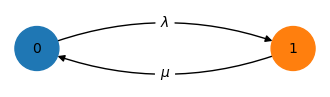

In [43]:
from MarkovModelModule import StateTransitionGraph # imports class     
import Constants as const

import matplotlib.pyplot as plt  # For plotting
import numpy as np
        
#%% create a transition graph for M/M/1-0
def createMM1(lam=1.0, mu=1.2):
    parameters={'lambda':lam, 'mu':mu}
    G = StateTransitionGraph(parameters)    
    
    G.addTransition(0, 1, G.sym("lambda"), tid = const.ARRIVAL, color='k')    
    G.addTransition(1, 0, G.sym("mu"), tid = const.DEPARTURE, color='k')    
    
    # set default labels and colors for nodes
    #G.setAllStateDefaultProperties() # labels and colors
    G.setStateProperties(0, color=plt.cm.tab20(0))
    G.setStateProperties(1, color=plt.cm.tab20(2))
    
    return G

# create transition graph and compute system characteristics
G = createMM1()
pos = {s:(s,0) for s in G.states()}
G.drawTransitionGraph(pos, bended=True, label_pos=0.5, figsize=(4,1));

## Transient State Probabilities
We compute and visualize the **transient state probabilities** of the M/M/1/1 system over time. Starting from an empty system (`X0`), it evaluates the state distribution at multiple time points using the CTMC's matrix exponential solution. The resulting plot shows how the probability mass evolves across states, providing insight into the system's **dynamic behavior** before reaching steady state.

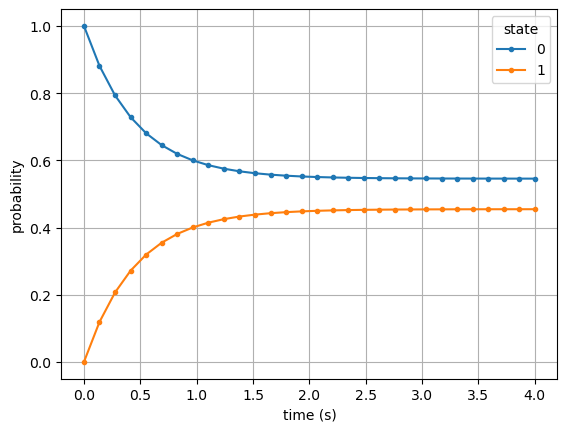

In [44]:
ts = np.linspace(0.0,4,30)   # consider those discrete points in time 
X0 = G.getEmptySystemProbs() # initialize the empty system

xt = np.zeros((len(G), len(ts))) # probability at time t
for i,t in enumerate(ts):
    probs_t = G.transientProbs(X0, t) # computes the matrix exponential
    xt[:,i] = np.array(list(probs_t.values()))

# plot the results
plt.figure(1, clear=True)
plt.plot(ts, xt.T, '.-')
plt.xlabel('time (s)')
plt.ylabel('probability')
plt.legend(probs_t.keys(), title='state')
plt.grid(which='major')
plt.show();

## Steady-state Probabilities
This plot compares the **transient probabilities** over time with their corresponding **steady-state values** for each state in the M/M/1/1 system. The dashed horizontal lines indicate the long-term equilibrium, while the transient curves show how the state probabilities converge as time progresses.

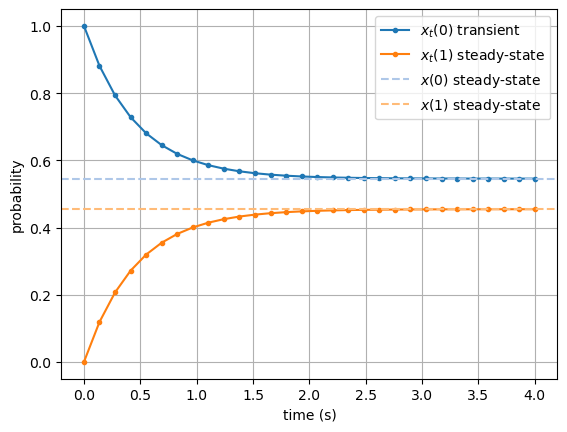

In [45]:
probs = G.calcSteadyStateProbs() # this is required to compute the steady state probabilities

plt.plot(ts, xt[0,:], '.-', label='$x_t(0)$ transient')
plt.plot(ts, xt[1,:], '.-', label='$x_t(1)$ steady-state')

plt.axhline(y=probs[0], color=plt.cm.tab20(1), linestyle='--',  label='$x(0)$ steady-state')
plt.axhline(y=probs[1], color=plt.cm.tab20(3), linestyle='--',  label='$x(1)$ steady-state')

plt.xlabel('time (s)')
plt.ylabel('probability')
plt.legend()
plt.grid(which='major')
plt.show();

## Symbolic Computation of Steady State Probabilities
We symbolically solve the **global balance equations** of the Markov model using SymPy and compares the results to numerical evaluations. It displays the **closed-form symbolic expressions** for each steady-state probability and validates them by comparing:  
- the **transient probability** at a large time `t`,  
- the **numerical steady-state solution**, and  
- the **evaluated symbolic expression** — confirming consistency across all approaches.

In [46]:
simplified_solution, num_dict  = G.symSolveMarkovModel()
display(simplified_solution)

for i in [0,1]:
    print(f"State {i}:")
    print(f"   {xt[i,-1]:.4f} = x_t({i}) at time t={ts[-1]}")
    print(f"   {probs[i]:.4f} = x({i}) is the steady-state probability")
    print(f"   {num_dict[i]:.4f} = x({i}) is the numerical value of the symbolic expression")

{x_{0}: mu/(lambda + mu), x_{1}: lambda/(lambda + mu)}

State 0:
   0.5455 = x_t(0) at time t=4.0
   0.5455 = x(0) is the steady-state probability
   0.5455 = x(0) is the numerical value of the symbolic expression
State 1:
   0.4545 = x_t(1) at time t=4.0
   0.4545 = x(1) is the steady-state probability
   0.4545 = x(1) is the numerical value of the symbolic expression
